In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('data.csv')

df.head()

,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-01-04,1,address_0,product_0,4
1,2018-01-04,1,address_0,product_1,4
2,2018-01-04,1,address_0,product_2,5
3,2018-01-04,1,address_0,product_3,10
4,2018-01-04,1,address_0,product_4,2


## Посмотрите формат таблиц

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222016 entries, 0 to 222015
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Дата          222016 non-null  object 
 1   Склад         222016 non-null  int64  
 2   Контрагент    222015 non-null  object 
 3   Номенклатура  222015 non-null  object 
 4   Количество    222015 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.5+ MB


In [6]:
df.describe()

,Склад,Количество
count,222016.000000,222015.000000
mean,2.893620,2.824314
std,1.355134,2.809743
min,1.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,4.000000
max,5.000000,200.000000


## Сразу переведем столбец "Дата" в правильный формат

In [18]:
df['Дата'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 301355 entries, 0 to 301354
Series name: Дата
Non-Null Count   Dtype 
--------------   ----- 
301355 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [90]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')
df['Дата'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 301355 entries, 0 to 301354
Series name: Дата
Non-Null Count   Dtype         
--------------   -----         
301355 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.3 MB


## Сгруппируйте данные по дате, посчитайте количество продаж

In [102]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

## Вывести несколько первых строк сгруппированных данных:

In [103]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


## Нарисуйте график продаж у **grouped_df**

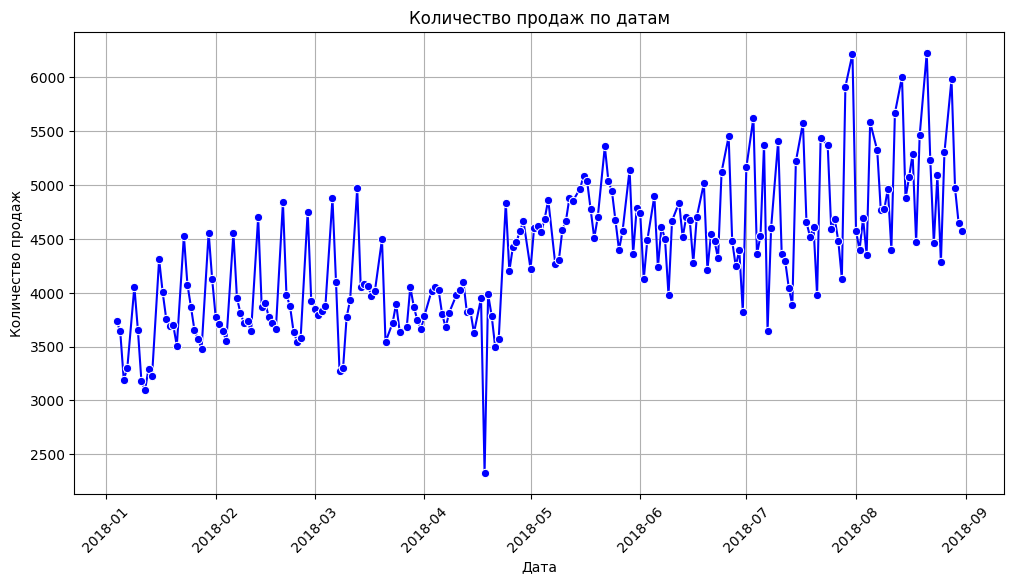

In [27]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=grouped_df, x='Дата', y='Количество', marker='o', color='b')
plt.title('Количество продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid()
plt.show()

##  Опишите что вы видите на графике. Ваша задача - максимально описать график

- В январе и феврале количество продаж колеблется в пределах 3500–4000 единиц.
- В марте начинается заметный рост, достигающий пиков до 5000 единиц.
- В апреле наблюдается снижение продаж с падением к уровню около 3500 к концу месяца.
- В начале мая продажи резко снижаются до минимума около 2500 единиц.
- С середины мая начинается постепенный рост, достигая 5000 единиц к концу июня.
- В июле и августе продажи продолжают расти, достигая пиков в 5500–6000 единиц.


## Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [29]:
max_sales_row = df[df['Количество'] == df['Количество'].max()]
max_sales_row

,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


## Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [34]:
filtered_data = df[(df['Дата'].dt.month.isin([6, 7, 8])) &
                     (df['Дата'].dt.dayofweek == 2) & # Monday = 0
                     (df['Склад'] == 3)]

top_product = filtered_data.groupby('Номенклатура')['Количество'].sum().idxmax()
top_product_quantity = filtered_data.groupby('Номенклатура')['Количество'].sum().max()

top_product, top_product_quantity

('product_1', 2267)

## Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день)

In [83]:
# source: https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%90%D1%81%D1%82%D0%B0%D0%BD%D0%B5

weather_df = pd.read_csv('weather_data.csv', encoding='utf-8', delimiter=';', skiprows=6, index_col=False)

weather_df.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.12.2018 23:00,-18.4,744.8,780.4,0.5,87.0,"Ветер, дующий с юго-запада",1,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,-20.0,0.6,12.0,NaN,NaN,NaN,NaN
1,31.12.2018 20:00,-17.2,744.3,779.6,0.6,86.0,"Ветер, дующий с юга",1,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,-19.0,0.6,12.0,NaN,NaN,NaN,NaN
2,31.12.2018 17:00,-14.8,743.7,778.6,0.8,84.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,NaN,NaN,NaN,-16.9,NaN,NaN,NaN,NaN,NaN,NaN
3,31.12.2018 14:00,-11.2,742.9,777.3,0.5,76.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,-14.6,NaN,NaN,NaN,NaN,NaN,NaN
4,31.12.2018 11:00,-12.7,742.4,777.1,0.5,79.0,"Ветер, дующий с юго-юго-востока",2,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",4.0,-15.6,0.3,12.0,NaN,NaN,NaN,NaN


In [93]:
weather_df['Дата'] = pd.to_datetime(weather_df['Местное время в Астане'], format='%d.%m.%Y %H:%M', errors='coerce').dt.date
daily_avg_temp_df = weather_df.groupby('Дата')['T'].mean().reset_index()
daily_avg_temp_df.columns = ['Дата', 'T']
daily_avg_temp_df.head()

,Дата,T
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.0750
4,2018-01-05,-16.8625


In [97]:
daily_avg_temp_df['Дата'] = pd.to_datetime(daily_avg_temp_df['Дата'], format='%Y-%m-%d')
daily_avg_temp_df['Дата'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 365 entries, 0 to 364
Series name: Дата
Non-Null Count  Dtype         
--------------  -----         
365 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 KB


In [98]:
df['Дата'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: Дата
Non-Null Count  Dtype         
--------------  -----         
205 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 KB


## объедините таблицу температуры с **grouped_df**

In [106]:
df = grouped_df.copy()
merged_df = pd.merge(grouped_df, daily_avg_temp_df, on='Дата', how='left')
merged_df

,Дата,Количество,T
0,2018-01-04,3734,-14.0750
1,2018-01-05,3643,-16.8625
2,2018-01-06,3193,-13.3000
3,2018-01-07,3298,-12.7500
4,2018-01-09,4055,-6.2500
...,...,...,...
200,2018-08-26,5302,11.9750
201,2018-08-28,5983,14.1125
202,2018-08-29,4969,13.8250
203,2018-08-30,4648,14.1750


## Нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

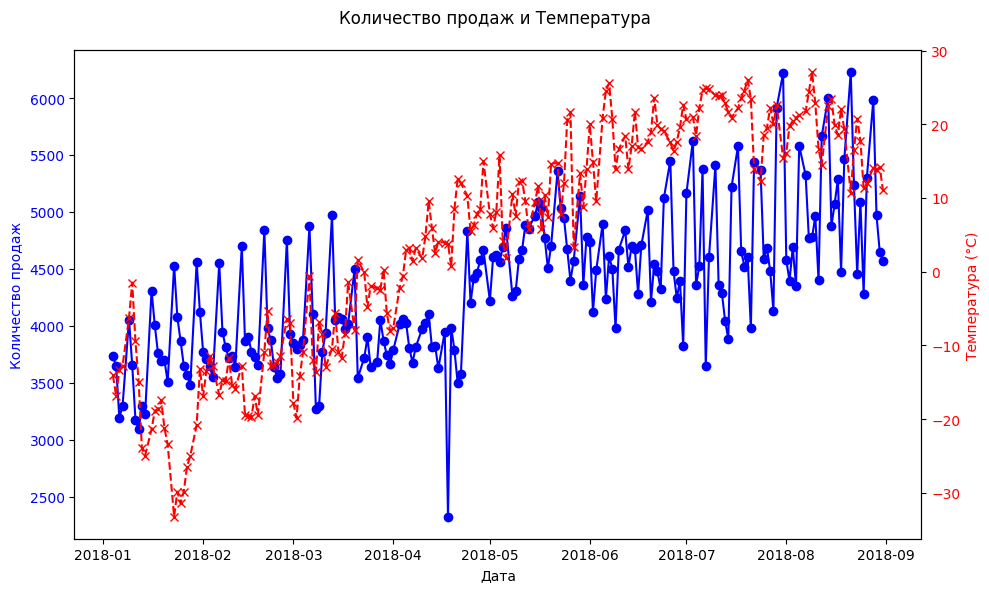

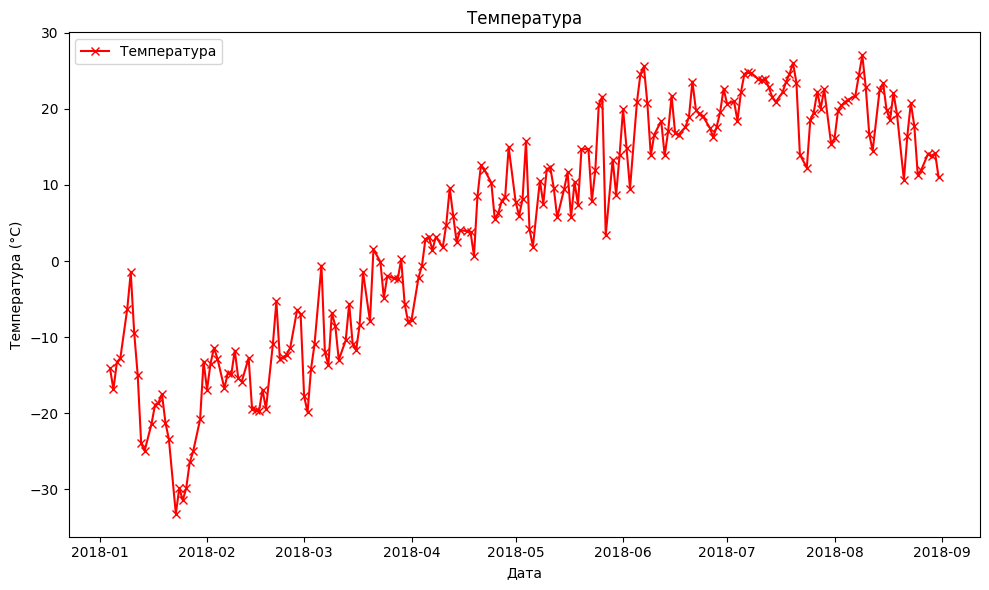

In [116]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(merged_df['Дата'], merged_df['Количество'], label='Количество продаж', color='b', linestyle='-', marker='o')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='r', linestyle='--', marker='x')
ax2.set_ylabel('Температура (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.suptitle('Количество продаж и Температура')
fig.tight_layout()
plt.show()

fig2, ax3 = plt.subplots(figsize=(10, 6))
ax3.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='r', linestyle='-', marker='x')
ax3.set_xlabel('Дата')
ax3.set_ylabel('Температура (°C)')
ax3.set_title('Температура')
ax3.legend()

plt.tight_layout()
plt.show()